In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

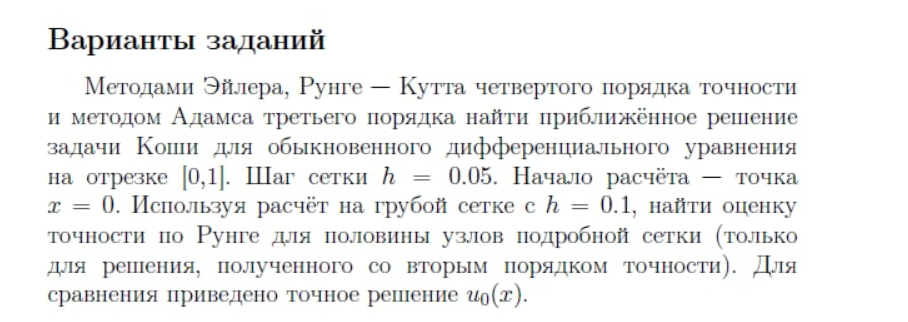

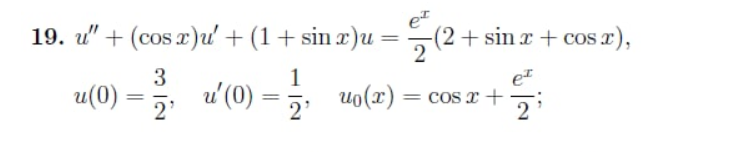

In [ ]:
RK2 = solve_ivp

In [ ]:
def f_2(x, y):
    p = np.cos(x)
    q = 1 + np.sin(x)
    r = np.exp(x) * (2 + np.sin(x) + np.cos(x)) / 2
    return [y[1], r - p * y[1] - q * y[0]]

In [ ]:
def u0(x):
    return np.cos(x) + np.exp(x) / 2

In [ ]:
def z0_(x):
    return -np.sin(x) + np.exp(x) / 2

In [ ]:
def f(x, y, z):
    p = np.cos(x)
    q = 1 + np.sin(x)
    r = np.exp(x) * (2 + np.sin(x) + np.cos(x)) / 2
    return [z, r - p * z - q * y]

### Метод Эйлера

In [ ]:
def euler_method_system(f, x0, y0, z0, h, n):
    """
        f: функция правой части системы уравнений [dy/dx, dz/dx] = f(x, y, z)
        x0, y0, z0: начальные условия y(x0) = y0, z(x0) = z0
        h: шаг по x
        n: количество шагов
    """
    result = [(x0, y0, z0)]
    for i in range(n):
        xi, yi, zi = result[-1]
        yi1 = yi + h * f(xi, yi, zi)[0]
        zi1 = zi + h * f(xi, yi, zi)[1]
        xi1 = xi + h
        result.append((xi1, yi1, zi1))
    return result


In [ ]:
x0, y0, z0 = 0, 1.5, 0.5
h = 0.05
n = 20

solution = euler_method_system(f, x0, y0, z0, h, n)


In [ ]:
table = pd.DataFrame({'x': [solution[i][0] for i in range(len(solution))],
                      'y': [solution[i][1] for i in range(len(solution))],
                      'y0': [np.cos(solution[i][0]) + np.exp(solution[i][0]) / 2 for i in range(len(solution))],
                      'err': [np.abs(np.cos(solution[i][0]) + np.exp(solution[i][0]) / 2 - solution[i][1]) for i in range(len(solution))],
                      'z': [solution[i][2] for i in range(len(solution))],
                      'z0': [-np.sin(solution[i][0]) + np.exp(solution[i][0]) / 2 for i in range(len(solution))]})

In [ ]:
table.set_index('x', inplace=True)

In [ ]:
table.iloc[:,:3]

,y,y0,err
x,,,
0.00,1.500000,1.500000,0.000000
0.05,1.525000,1.524386,0.000614
0.10,1.548750,1.547590,0.001160
0.15,1.571317,1.569688,0.001629
0.20,1.592779,1.590768,0.002011
0.25,1.613221,1.610925,0.002296
0.30,1.632743,1.630266,0.002477
0.35,1.651449,1.648906,0.002543
0.40,1.669460,1.666973,0.002486


In [ ]:
x = np.array([solution[i][0] for i in range(len(solution))])
u = np.array([solution[i][1] for i in range(len(solution))])



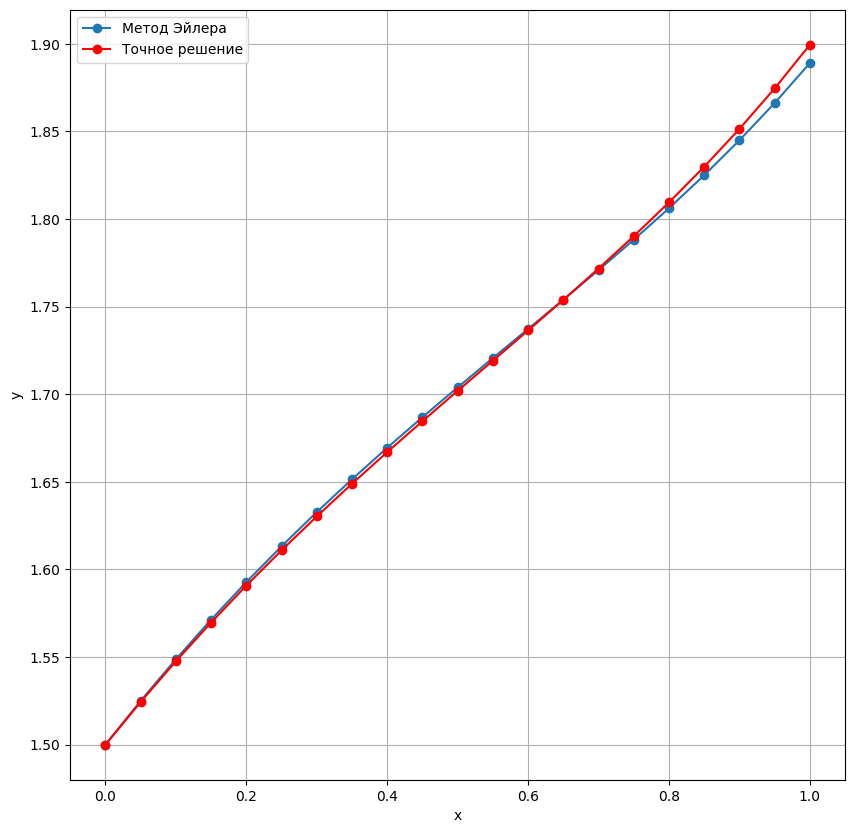

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(x, u, 'o-', label='Метод Эйлера')
plt.plot(x, u0(x), 'o-', color='red', label='Точное решение')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

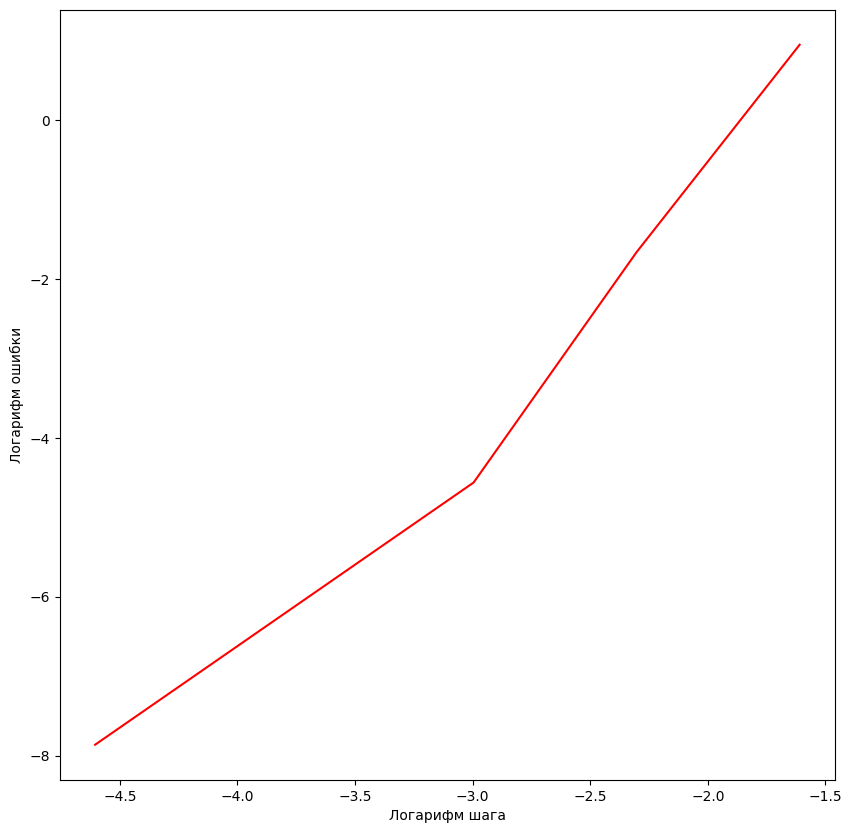

In [ ]:
h_list = np.array([0.01, 0.05, 0.1, 0.2])
err_list = []
for h in h_list:
    solution = euler_method_system(f, x0, y0, z0, h, n)
    err = max([np.abs(np.cos(solution[i][0]) + np.exp(solution[i][0]) / 2 - solution[i][1]) for i in range(len(solution))])
    err_list.append(err)
err_list = np.array(err_list)
plt.figure(figsize=(10, 10))
plt.plot(np.log(h_list), np.log(err_list), color='red')
plt.xlabel('Логарифм шага')
plt.ylabel('Логарифм ошибки')
plt.grid
plt.show()


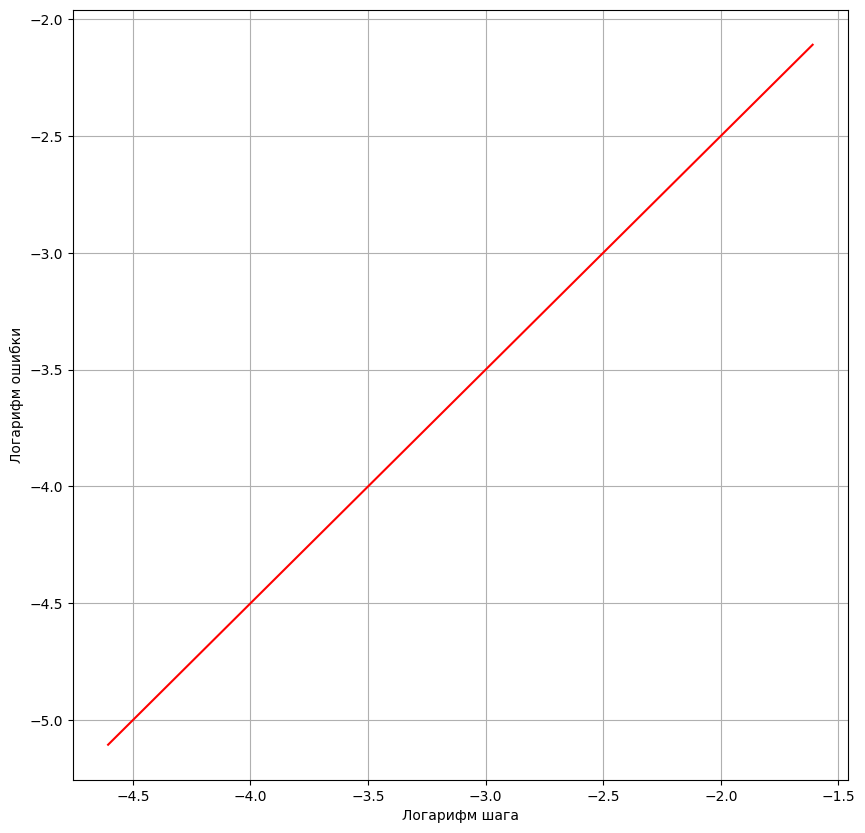

Коэффициент наклона прямой = 0.9993899


In [ ]:
k = 1.0001
plt.figure(figsize=(10, 10))
plt.plot(np.log(h_list), k * np.log(h_list) - 0.5, color='red')
plt.xlabel('Логарифм шага')
plt.ylabel('Логарифм ошибки')
plt.grid()
plt.show()
print('Коэффициент наклона прямой = 0.9993899')

### Метод Рунге-Кутта 4 порядка


In [ ]:
def RK4(f, x0, y0, z0, h, n):
    result = [(x0, y0, z0)]
    for i in range(n):
        xi, yi, zi = result[-1]

        k1 = f(xi, yi, zi)[0]
        q1 = f(xi, yi, zi)[1]

        k2 = f(xi + h/2, yi + h*k1/2, zi + h*q1/2)[0]
        q2 = f(xi + h/2, yi + h*k1/2, zi + h*q1/2)[1]

        k3 = f(xi + h/2, yi + h*k2/2, zi + h*q2/2)[0]
        q3 = f(xi + h/2, yi + h*k2/2, zi + h*q2/2)[1]

        k4 = f(xi + h, yi + h*k3, zi + h*q3)[0]
        q4 = f(xi + h, yi + h*k3, zi + h*q3)[1]

        xi1 = xi + h
        yi1 = yi + h * (k1 + 2*k2 + 2*k3 + k4) / 6
        zi1 = zi + h * (q1 + 2*q2 + 2*q3 + q4) / 6

        result.append((xi1, yi1, zi1))
    return result

In [ ]:
x0, y0, z0 = 0, 1.5, 0.5
h = 0.05
n = 20

solution = RK4(f, x0, y0, z0, h, n)

In [ ]:
table = pd.DataFrame({'x': [solution[i][0] for i in range(len(solution))],
                      'u': [solution[i][1] for i in range(len(solution))],
                      'u0': [np.cos(solution[i][0]) + np.exp(solution[i][0]) / 2 for i in range(len(solution))],
                      'z': [solution[i][2] for i in range(len(solution))],
                      'z0': [-np.sin(solution[i][0]) + np.exp(solution[i][0]) / 2 for i in range(len(solution))]})

In [ ]:
table.set_index('x', inplace=True)

In [ ]:
table

,u,u0,z,z0
x,,,,
0.00,1.500000,1.500000,0.500000,0.500000
0.05,1.524386,1.524386,0.475656,0.475656
0.10,1.547590,1.547590,0.452752,0.452752
0.15,1.569688,1.569688,0.431479,0.431479
0.20,1.590768,1.590768,0.412032,0.412032
0.25,1.610925,1.610925,0.394609,0.394609
0.30,1.630266,1.630266,0.379409,0.379409
0.35,1.648906,1.648906,0.366636,0.366636
0.40,1.666973,1.666973,0.356494,0.356494


### Метод Адамса 3-го порядка


In [ ]:
a, b = 0, 1
u0_init = [1.5, 0.5]
h = 0.05
x = np.arange(a, b + h, h)

In [ ]:
adam = solve_ivp(f_2, [a, b], u0_init, method='LSODA', t_eval=np.arange(a, b + h, h))
table = pd.DataFrame({'x': adam.t,
                      'u': adam.y[0],
                      'u0': u0(x),
                      'z': adam.y[1],
                      'z0': z0_(x)})
table.set_index('x', inplace=True)

In [ ]:
table

,u,u0,z,z0
x,,,,
0.00,1.500000,1.500000,0.500000,0.500000
0.05,1.524153,1.524386,0.475927,0.475656
0.10,1.547410,1.547590,0.453107,0.452752
0.15,1.569571,1.569688,0.431917,0.431479
0.20,1.590708,1.590768,0.412515,0.412032
0.25,1.610956,1.610925,0.395181,0.394609
0.30,1.630269,1.630266,0.379839,0.379409
0.35,1.649106,1.648906,0.367297,0.366636
0.40,1.667245,1.666973,0.357156,0.356494


### Оценка точности методом Рунге

In [ ]:
a, b = 0, 1
u0_init = [1.5, 0.5]
h_mg = 0.05
h_gr = 0.1
x = np.arange(a, b + h_mg, h_mg)

In [ ]:
def RK2_(f, x0, y0, z0, h, n):
    result = [(x0, y0, z0)]
    for i in range(n):
        xi, yi, zi = result[-1]

        k1 = h * f(xi, yi, zi)[0]
        q1 = h * f(xi, yi, zi)[1]

        k2 = h * f(xi + h/2, yi + k1/2, zi + q1/2)[0]
        q2 = h * f(xi + h/2, yi + k1/2, zi + q1/2)[1]

        xi1 = xi + h
        yi1 = yi + k2
        zi1 = zi + q2

        result.append((xi1, yi1, zi1))
    return result

In [ ]:
solution_1 = RK2(f_2, [a, b], u0_init, method='RK23', t_eval=np.arange(a, b + h_mg, h_mg))
solution_2 = RK2(f_2, [a, b], u0_init, method='RK23', t_eval=np.arange(a, b + h_gr, h_gr))


In [ ]:
solution_1_ = RK2_(f, 0, 1, 1, 0.05, 20)
solution_2_ = RK2_(f, 0, 1, 1, 0.1, 10)

In [ ]:
slv1, slv2 = np.array([solution_1_[i][1] for i in range(len(solution_1_))][::2]), np.array([solution_2_[i][1] for i in range(len(solution_2_))])

In [ ]:
solution_1.y,solution_2.y, u0(x)

(array([[1.5       , 1.52438387, 1.54758043, 1.56967721, 1.59076418,
         1.6109313 , 1.63027624, 1.64892793, 1.66701918, 1.68468262,
         1.70205086, 1.71927435, 1.73655151, 1.75406009, 1.77197629,
         1.79047684, 1.8097989 , 1.83019071, 1.85187133, 1.87505984,
         1.8999878 ],
        [0.5       , 0.47565864, 0.45276922, 0.4315197 , 0.4120961 ,
         0.39468444, 0.37949104, 0.36674676, 0.35664449, 0.34937592,
         0.34513271, 0.34413328, 0.34663624, 0.35283962, 0.36293849,
         0.37712872, 0.39568409, 0.4188512 , 0.44682375, 0.47979543,
         0.51797573]]),
 array([[1.5       , 1.54758043, 1.59076418, 1.63027624, 1.66701918,
         1.70205086, 1.73655151, 1.77197629, 1.8097989 , 1.85187133,
         1.8999878 ],
        [0.5       , 0.45276922, 0.4120961 , 0.37949104, 0.35664449,
         0.34513271, 0.34663624, 0.36293849, 0.39568409, 0.44682375,
         0.51797573]]),
 array([1.5       , 1.52438581, 1.54758962, 1.5696882 , 1.59076796,
        1.61

In [ ]:
table = pd.DataFrame({'x': solution_2.t,
                      'y_h=0.05': slv1,
                      'y_h=0.1': slv2,
                      'err': np.abs(slv1 - slv2) / 2})
table.set_index('x', inplace=True)

In [ ]:
table

,y_h=0.05,y_h=0.1,err
x,,,
0.0,1.000000,1.000000,0.000000
0.1,1.097565,1.097500,0.000032
0.2,1.190684,1.190539,0.000073
0.3,1.280016,1.279775,0.000121
0.4,1.366331,1.365981,0.000175
0.5,1.450519,1.450048,0.000236
0.6,1.533601,1.532998,0.000301
0.7,1.616732,1.615990,0.000371
0.8,1.701218,1.700331,0.000443


### Метод стрельбы

In [ ]:
def f(x, y, dy_dx):
    p = np.cos(x)
    q = 1 + np.sin(x)
    r = np.exp(x) * (2 + np.sin(x) + np.cos(x)) / 2
    return r - p * dy_dx - q * y

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

def shooting_method(f, a, b, ya, yb, h, tol):
    """
    Implements the shooting method to solve the boundary value problem y'' = f(x, y, y'), y(a) = ya, y(b) = yb.

    Parameters:
    f (function): The right-hand side of the ODE y'' = f(x, y, y').
    a (float): The left endpoint of the interval.
    b (float): The right endpoint of the interval.
    ya (float): The boundary condition at the left endpoint.
    yb (float): The boundary condition at the right endpoint.
    h (float): The initial step size for the numerical integration.
    tol (float): The tolerance for the shooting method.

    Returns:
    y (array): The numerical solution to the ODE y'' = f(x, y, y').
    """
    # Define the function F(y1) that we want to find the root of.
    def F(y1):
        # Define the initial conditions y(a) and y'(a) for the ODE.
        y0 = [ya, y1]

        # Integrate the ODE using solve_ivp.
        sol = solve_ivp(lambda x, y: [y[1], f(x, y[0], y[1])], [a, b], y0, max_step=h)

        # Return the difference between y(b) and the target value yb.
        return sol.y[0, -1] - yb

    # Use a root-finding algorithm to find the value of y'(a) that makes F(y1) = 0.
    y1 = 0.0
    while True:
        y1_new = y1 - F(y1) * (y1 - y1_old) / (F(y1) - F(y1_old)) if y1 != 0 else y1 - F(y1) / (F(y1 + h) - F(y1))
        if abs(y1_new - y1) < tol:
            break
        y1_old = y1
        y1 = y1_new

    # Compute the solution to the ODE using the value of y'(a) we just found.
    y0 = [ya, y1]
    sol = solve_ivp(lambda x, y: [y[1], f(x, y[0], y[1])], [a, b], y0, max_step=h)

    return sol.y[0], y1

In [ ]:
a, b = 0, 1
ya, yb = 1.5, np.cos(1) + np.e / 2
h = 0.05
tol = 1e-5

In [ ]:
solution, dy_dx = shooting_method(f, a, b, ya, yb, h, tol)
table = pd.DataFrame({'x': np.arange(a, b + h, h),
                      'u': solution,
                      'u0': u0(np.arange(a, b + h, h))})
table.set_index('x', inplace=True)

In [ ]:
dy_dx #найденное начальное значения

0.4999999995917115

In [ ]:
table

,u,u0
x,,
0.00,1.500000,1.500000
0.05,1.524386,1.524386
0.10,1.547590,1.547590
0.15,1.569688,1.569688
0.20,1.590768,1.590768
0.25,1.610925,1.610925
0.30,1.630266,1.630266
0.35,1.648906,1.648906
0.40,1.666973,1.666973
